In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!cp /content/drive/MyDrive/Dataset/eeg/imports/data_import.py /content
!cp /content/drive/MyDrive/Dataset/eeg/imports/transformer_encoder.py /content
!cp /content/drive/MyDrive/Dataset/eeg/imports/conv1dAndBILSTM_encoder.py /content
from data_import import data_load 
import transformer_encoder as tr #import tranformer
from conv1dAndBILSTM_encoder import conv1d,biLSTM
strt= 50 #start
flen = 200  #length

In [3]:
import numpy as np
import matplotlib.pylab as plt
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf

In [4]:
def plotter(enc):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(enc + ' accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuarcy', 'val_accuracy'], loc='best')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(enc + ' loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss','val_loss'], loc='best')
    plt.show()

#Transformer


In [8]:
class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('val_accuracy') >= 0.995):
			print("\nReached %2.22f%% accuracy, so stopping training!!" %(0.995))
			self.model.stop_training = True

x_train,y_train,x_test,y_test,x_val,y_val = data_load(50 ,200)

trans = tr.transformer(x = x_train.shape[1] , y = x_train.shape[2])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 128)]        0         
_________________________________________________________________
transformer_block_1 (Transfo (None, 200, 128)          140832    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 40)                5160      
Total params: 162,504
Trainable params: 162,504
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = trans.fit(x_train, y_train, validation_data=(x_test, y_test),
                   epochs=45, batch_size=32,callbacks = myCallback())

Epoch 1/45
300/300 [==============================] - 5s 13ms/step - loss: 2.0623 - accuracy: 0.4186 - val_loss: 1.0125 - val_accuracy: 0.6817
Epoch 2/45
300/300 [==============================] - 4s 12ms/step - loss: 0.6985 - accuracy: 0.7783 - val_loss: 0.4874 - val_accuracy: 0.8446
Epoch 3/45
300/300 [==============================] - 4s 12ms/step - loss: 0.3512 - accuracy: 0.8971 - val_loss: 0.3022 - val_accuracy: 0.9098
Epoch 4/45
300/300 [==============================] - 4s 12ms/step - loss: 0.2633 - accuracy: 0.9224 - val_loss: 0.2650 - val_accuracy: 0.9231
Epoch 5/45
300/300 [==============================] - 4s 12ms/step - loss: 0.1715 - accuracy: 0.9476 - val_loss: 0.2796 - val_accuracy: 0.9181
Epoch 6/45
300/300 [==============================] - 4s 12ms/step - loss: 0.1429 - accuracy: 0.9579 - val_loss: 0.1523 - val_accuracy: 0.9591
Epoch 7/45
300/300 [==============================] - 4s 12ms/step - loss: 0.1475 - accuracy: 0.9585 - val_loss: 0.1921 - val_accuracy: 0.9424

38/38 [==============================] - 0s 8ms/step - loss: 0.1179 - accuracy: 0.9683
[0.11792673915624619, 0.9682539701461792]


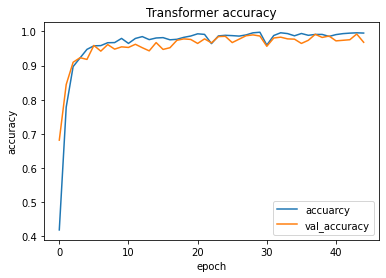

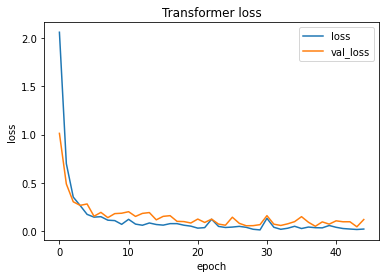

In [10]:
print(trans.evaluate(x_test, y_test))
plotter('Transformer')
del(trans)

#Conv1d and BiLSTM


In [5]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# defining the keras callbacks to be used while training the network
modelcheckpoint = ModelCheckpoint('lstm_model.h5', save_best_only=True, monitor='val_acc', verbose=1)
earlystopping = EarlyStopping(monitor='val_acc', verbose=1, patience=10)

x_train,y_train,x_test,y_test,x_val,y_val = data_load(320 ,160)

conv = conv1d()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 160, 128)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 158, 128)          49280     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 79, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 77, 64)            24640     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 38, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 36, 32)            6176      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 18, 32)            0     

In [6]:
history = conv.fit(x_train, y_train, batch_size=128, epochs=75, callbacks=[modelcheckpoint, earlystopping], validation_data=(x_test, y_test))

Epoch 1/75
75/75 [==============================] - 33s 24ms/step - loss: 0.0243 - accuracy: 0.0385 - val_loss: 0.0238 - val_accuracy: 0.0593
Epoch 2/75
75/75 [==============================] - 1s 13ms/step - loss: 0.0223 - accuracy: 0.1672 - val_loss: 0.0204 - val_accuracy: 0.2623
Epoch 3/75
75/75 [==============================] - 1s 13ms/step - loss: 0.0192 - accuracy: 0.3294 - val_loss: 0.0175 - val_accuracy: 0.4110
Epoch 4/75
75/75 [==============================] - 1s 13ms/step - loss: 0.0165 - accuracy: 0.4658 - val_loss: 0.0154 - val_accuracy: 0.5046
Epoch 5/75
75/75 [==============================] - 1s 13ms/step - loss: 0.0138 - accuracy: 0.5764 - val_loss: 0.0135 - val_accuracy: 0.5873
Epoch 6/75
75/75 [==============================] - 1s 13ms/step - loss: 0.0118 - accuracy: 0.6474 - val_loss: 0.0127 - val_accuracy: 0.6082
Epoch 7/75
75/75 [==============================] - 1s 13ms/step - loss: 0.0103 - accuracy: 0.7039 - val_loss: 0.0121 - val_accuracy: 0.6441
Epoch 8/75
7

38/38 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 0.9440
[0.002113369759172201, 0.9440267086029053]


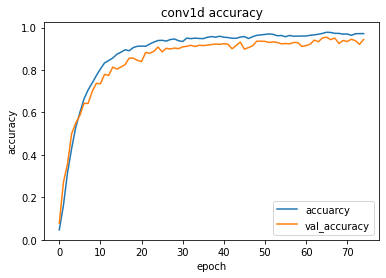

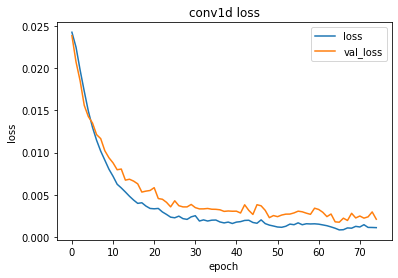

In [15]:
print(conv.evaluate(x_test, y_test))
del(conv)
plotter('conv1d')

In [20]:
bi_enc = biLSTM()

In [21]:
history = bi_enc.fit(x_train, y_train, batch_size=128, epochs=40, callbacks=[modelcheckpoint, earlystopping], validation_data=(x_test, y_test))

Epoch 1/40
75/75 [==============================] - 15s 53ms/step - loss: 3.3782 - accuracy: 0.1255 - val_loss: 1.9393 - val_accuracy: 0.3693
Epoch 2/40
75/75 [==============================] - 3s 36ms/step - loss: 1.6374 - accuracy: 0.4792 - val_loss: 1.1421 - val_accuracy: 0.6391
Epoch 3/40
75/75 [==============================] - 3s 36ms/step - loss: 0.9837 - accuracy: 0.7073 - val_loss: 0.8446 - val_accuracy: 0.7218
Epoch 4/40
75/75 [==============================] - 3s 36ms/step - loss: 0.7110 - accuracy: 0.7849 - val_loss: 0.5997 - val_accuracy: 0.8129
Epoch 5/40
75/75 [==============================] - 3s 36ms/step - loss: 0.4774 - accuracy: 0.8606 - val_loss: 0.6762 - val_accuracy: 0.7845
Epoch 6/40
75/75 [==============================] - 3s 37ms/step - loss: 0.4638 - accuracy: 0.8692 - val_loss: 0.3979 - val_accuracy: 0.8780
Epoch 7/40
75/75 [==============================] - 3s 37ms/step - loss: 0.2444 - accuracy: 0.9386 - val_loss: 0.3254 - val_accuracy: 0.9048
Epoch 8/40
7

38/38 [==============================] - 0s 13ms/step - loss: 0.0432 - accuracy: 0.9916
[0.04319915547966957, 0.9916457533836365]


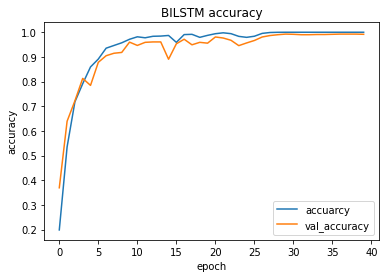

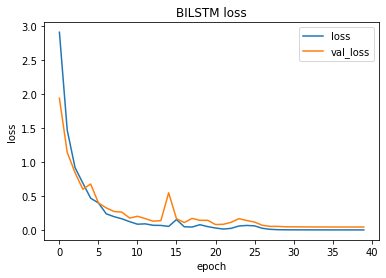

In [22]:
print(bi_enc.evaluate(x_test, y_test))
plotter('BILSTM')